Stock price prediction using LSTM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.5 MB/s eta 0:00:00


In [3]:
# Importing all the libraries
from datetime import datetime, time
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader

In [4]:
A_data = pd.read_csv("/content/drive/MyDrive/EE782-AML/A1/dataset/A_1min.txt",header = None)
# Loading the first dataset

In [5]:
def filtered_data(data):
  data.columns = ['Timestamp','Open','High','Low','Close','Volume']
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])
  filtered = data[((data['Timestamp'].dt.hour >= 9)) & ((data['Timestamp'].dt.hour <= 15))]
  return filtered
# Filtering the dataset to consider the data only between the trading hours

a) Plot the minute-by-minute closing price series of few stocks

In [6]:
def min_linechart(data,start_time,close_time):
  data = filtered_data(data)
  data.columns = ['Timestamp','Open','High','Low','Close','Volume']
  data.set_index('Timestamp',inplace=True)
  mpf.plot(data[data.index.get_loc(start_time):data.index.get_loc(close_time)],volume=True,style='yahoo',type='line')
  mpf.plot(data[data.index.get_loc(start_time):data.index.get_loc(close_time)],volume=True,style='yahoo',type='candle')

  return
# Using mpf library to define a function to plot the linechart between a specified time interval passes as an input

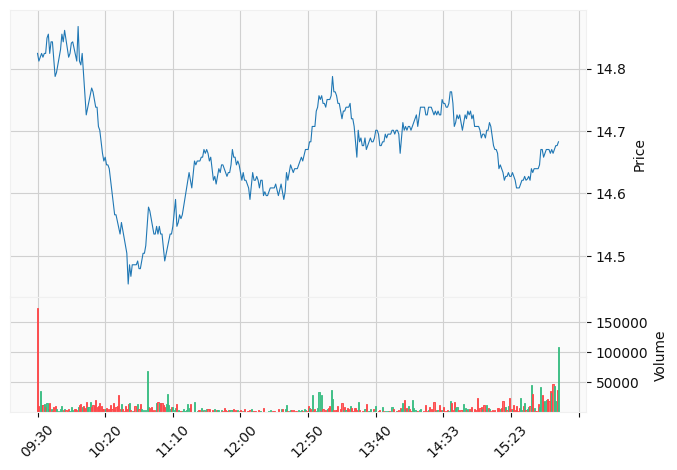

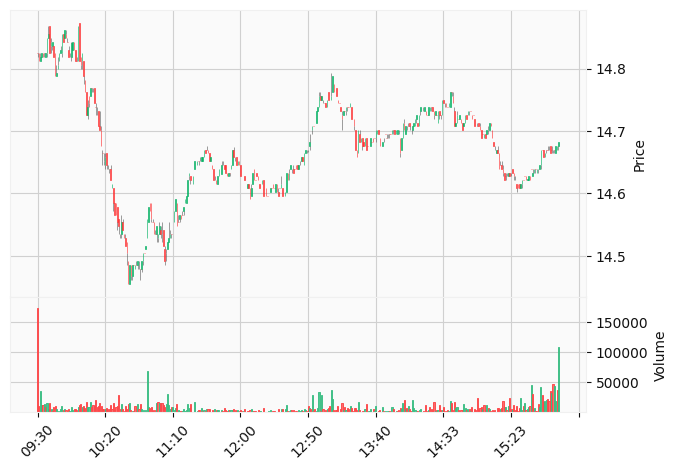

In [7]:

min_linechart(A_data,"2005-01-03 09:30:00",'2005-01-03 15:59:00')

b) Plot the day-by-day closing price series of a few stocks

In [8]:
def day_cp(data,start_date,end_date):
  data = filtered_data(data)
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # Convert 'Timestamp' column to datetime
  data.set_index('Timestamp', inplace=True) # Set the timestamp column as index

  # Resample the data to get day-by-day closing prices at 15:30:00
  intraday = data.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})
  intraday['Open'].fillna(method='ffill', inplace=True)
  intraday['Close'].fillna(method='ffill', inplace=True)
  intraday['High'].fillna(method='ffill', inplace=True)
  intraday['Low'].fillna(method='ffill', inplace=True)
  print(intraday)
  mpf.plot(intraday[intraday.index.get_loc(start_date):intraday.index.get_loc(end_date)], volume=True, style='yahoo', type='line')
  mpf.plot(intraday[intraday.index.get_loc(start_date):intraday.index.get_loc(end_date)], volume=True, style='yahoo', type='candle')
# Using mpf library to plot the line chart and the candlestick chart of daywise data between the given start and end dates

<ipython-input-8-513979c09618>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # Convert 'Timestamp' column to datetime


                Open      High       Low     Close   Volume
Timestamp                                                  
2005-01-03   14.8242   14.8734   14.4551   14.6827  3218618
2005-01-04   14.6274   14.7565   14.1783   14.3075  3655769
2005-01-05   14.2522   14.5474   14.2214   14.3014  3706235
2005-01-06   14.3936   14.4182   13.9569   13.9877  3052818
2005-01-07   13.9507   14.1168   13.9200   13.9630  2581548
...              ...       ...       ...       ...      ...
2022-02-21  130.5000  133.4300  130.0000  132.0500        0
2022-02-22  131.7300  132.6899  129.2600  130.5500  1807525
2022-02-23  129.8800  134.3700  125.9500  125.9900  2300338
2022-02-24  123.7100  128.6300  123.0500  128.2300  2013724
2022-02-25  128.8400  133.7500  127.9200  133.6900  1855861

[6263 rows x 5 columns]


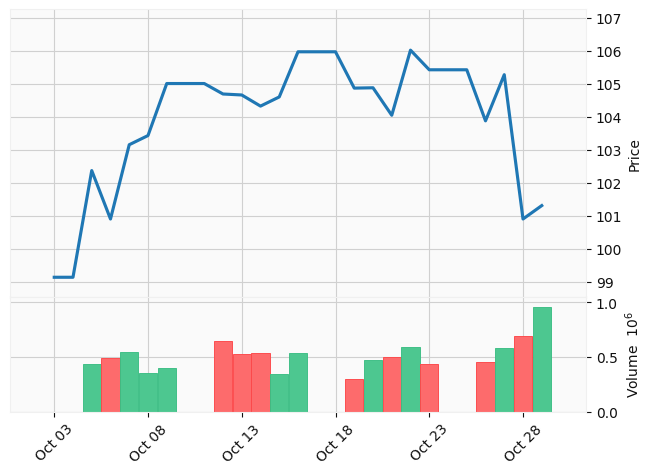

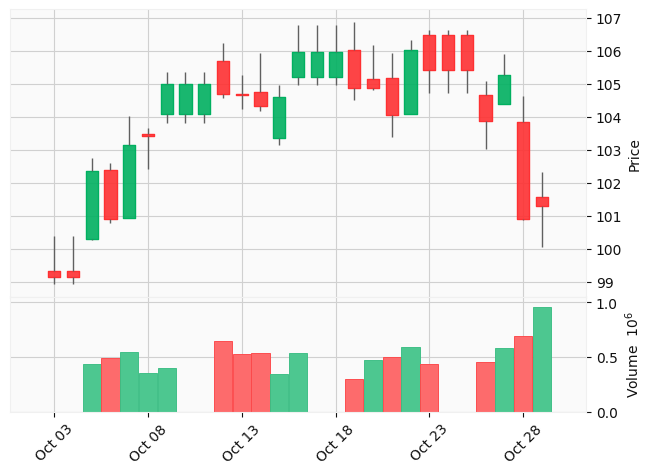

In [9]:
day_cp(A_data,"2020-10-03","2020-10-30")

c) Plot a complete candlestick chart with volume on secondary y-axis for a few stocks with a
time period of your choice

In [10]:
def timeperiod_cp(data,timeperiod):
  data = filtered_data(data)
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # Converting 'Timestamp' column into datetime
  data.set_index('Timestamp', inplace=True)
  tp_data = data.resample(timeperiod).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}) # Resampling the data according to the timeperiod
  tp_data['Open'].fillna(method='ffill', inplace=True)
  tp_data['Close'].fillna(method='ffill', inplace=True)
  tp_data['High'].fillna(method='ffill', inplace=True)
  tp_data['Low'].fillna(method='ffill', inplace=True)
  mpf.plot(tp_data, volume=True, style='yahoo', type='line')
  mpf.plot(tp_data, volume=True, style='yahoo', type='candle')

<ipython-input-1042-aa1c9caf1b36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # Converting 'Timestamp' column into datetime


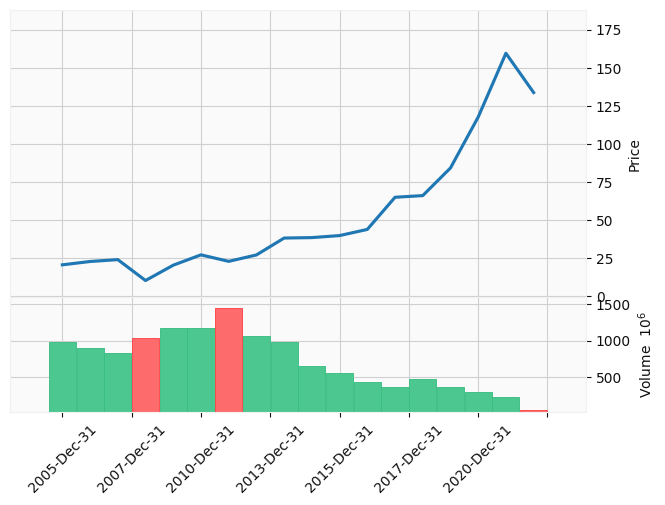

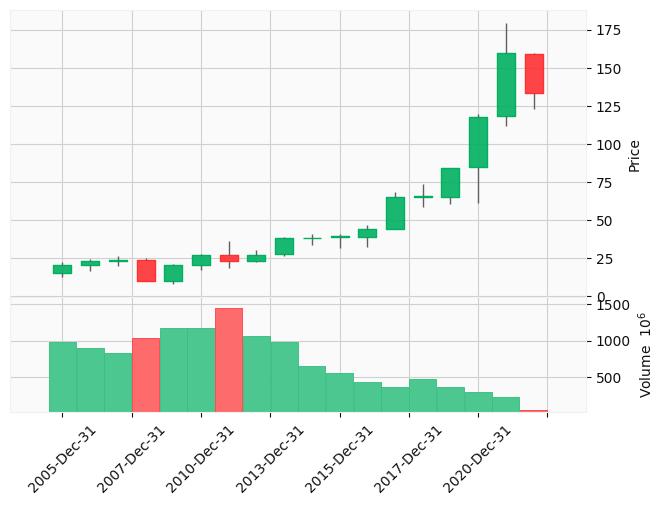

In [ ]:
timeperiod_cp(A_data,'y') # The timeperiod is currently set to yearwise
# One may change the timeperiod to 'D' or 'M to get the monthly or daywise plot

d) Note down your observations, e.g. are there any data issues, unexpected jumps,
unexpected missing data etc.

The trading hours are only between 9:30 to 16:00. However, there are some trades that have taken place after 16:00. Also, it rarely happens that the closing price of the previous day is equal to the opening price on the following data. All these factors lead to a lot of discontinuities in the data.

In [11]:
# This code is used to calculate a list of opening times and closing times for 20 days
freq = pd.DateOffset(minutes=1)
daily = pd.DateOffset(days=1)
begin = pd.date_range(start = "2005-01-03 09:30:00", end = "2005-01-23 09:30:00",freq = daily)
end = pd.date_range(start = "2005-01-03 15:59:00", end = "2005-01-23 15:59:00",freq = daily)
expected_timestamps = []
for i in range(20):
  timestamp = pd.date_range(start=begin[i], end=end[i], freq = freq)
  expected_timestamps.append(timestamp)

In [12]:
# We'll now find if there are any missing timestamps and append it to the list
missing_timestamps = []
data = filtered_data(A_data)
for timestamps in expected_timestamps:
  missing = timestamps.difference(data.index)
  missing_timestamps.append(missing)

In [13]:
missing_timestamps
# As can be seen there are a lot of missing data. In addition to intraday missing data, the market remains closed on Saturdays and Sundays and hence, data is not available on these days

[DatetimeIndex(['2005-01-03 09:30:00', '2005-01-03 09:31:00',
                '2005-01-03 09:32:00', '2005-01-03 09:33:00',
                '2005-01-03 09:34:00', '2005-01-03 09:35:00',
                '2005-01-03 09:36:00', '2005-01-03 09:37:00',
                '2005-01-03 09:38:00', '2005-01-03 09:39:00',
                ...
                '2005-01-03 15:50:00', '2005-01-03 15:51:00',
                '2005-01-03 15:52:00', '2005-01-03 15:53:00',
                '2005-01-03 15:54:00', '2005-01-03 15:55:00',
                '2005-01-03 15:56:00', '2005-01-03 15:57:00',
                '2005-01-03 15:58:00', '2005-01-03 15:59:00'],
               dtype='datetime64[ns]', length=390, freq='<DateOffset: minutes=1>'),
 DatetimeIndex(['2005-01-04 09:30:00', '2005-01-04 09:31:00',
                '2005-01-04 09:32:00', '2005-01-04 09:33:00',
                '2005-01-04 09:34:00', '2005-01-04 09:35:00',
                '2005-01-04 09:36:00', '2005-01-04 09:37:00',
                '2005-01-04

2. Try at least two ways to normalize the data as stock prices and volumes change over time and are
different across companies, and pick one by noting your justification. [1]

The MinMaxScaler and the standard scaler(Z-score normalisation) are the two most popularly used scaling methods in ML.

In [14]:
def scaling_minmax(data):
  # input = data.drop('Timestamp',axis=1).values
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data.values)
  return scaled_data
# This scales the values to the range [0,1]. However, it doesnot capture outliers and doesnot indicate relative variation in the prices

In [15]:
def scaling_std(data):
  # input = data.drop('Timestamp',axis=1).values
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data.values)
  return scaled_data
# This scales the data in such a way that it mean becomes 0 and the variance becomes unity.
# The values are not scaled to be in any particular range unlike MinMaxScaler and it also captures relative movement in the prices around the mean value.
# Hence, this is a better choice to scale the data

3. Make some scenario decisions:






(a) Inter day swing trading

(b) Assume a buy-ask spread (inversely related to volume and directly related to price) and
trade commission based on a quick market research. Your trade will lose the buy-ask
spread and commissions every time you trade.

I am planning to incorporate transaction costs and trade commission after training the model as a part of my trading strategy on the predicted stock prices. Since buy ask spread refers to the difference between the price at which the stock is bought and the price at which it is sold,I've modelled the buy ask spread as the difference between the high and the low price and normalised it to the current market price in order to model it as a percentage

(c) Trade only one stock

4. Write a pytorch module for defining an LSTM model. Keep it flexible so that the input dimension,
number of units, number of layers can easily be changed.

In [16]:
# Defining a LSTM class to define the model
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim,batch_first=True):
        super(LSTM, self).__init__()

        # Define LSTM architecture
        self.lstm = nn.LSTM(
            input_size=input_dim,# Number of input features
            hidden_size=hidden_dim,# Number of hidden cells
            num_layers=num_layers,# Number of LSTM layers
            batch_first=batch_first
        )# Using the pytorch library to build the LSTM architecture

        # Fully connected layer for output
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Forward pass through the LSTM layer
        lstm_out, _ = self.lstm(x)

        # Pass the output of the last time step through the fully connected layer
        out = self.fc(lstm_out[:, -1, :])

        return out

5. Write a flexible dataloader for training the LSTM model, especially if you are high frequency data.
The inputs should be open, close, high, low, volume of one or more stocks (e.g. other stocks that can
help predict the chosen stock price).

In [17]:
# Defining a custom train test split function to split such that test data is created for the last 2 years
def train_test_split(data,index):
  size = len(data)
  train = data[:index+1]
  test = data[index+1:]
  return train,test

In [18]:
data.set_index('Timestamp',inplace = True)
data.index.get_loc("2020-02-25 15:59:00")
# Getting the index

1467297

In [19]:
data.reset_index('Timestamp',inplace=True)

In [20]:
train,test = train_test_split(data.drop('Timestamp',axis=1),1467297)

In [21]:
# Applying z-score normalisation to the feature data
scaler_X = StandardScaler()
train.loc[:,['Open','High','Low','Volume']] = scaler_X.fit_transform(train.drop('Close',axis=1))
train

,Open,High,Low,Close,Volume
0,-1.072225,-1.072640,-1.072147,14.8242,9.814133
1,-1.072225,-1.072640,-1.072483,14.8119,0.068170
2,-1.072891,-1.072640,-1.072483,14.8181,1.564987
3,-1.072555,-1.072640,-1.072147,14.8242,0.176309
4,-1.072225,-1.072640,-1.072147,14.8181,0.226155
...,...,...,...,...,...
1467293,2.298571,2.297516,2.290037,76.9758,0.565443
1467294,2.292162,2.291108,2.286296,76.8475,0.646340
1467295,2.285753,2.290572,2.285229,76.9511,0.833114
1467296,2.291626,2.290572,2.287368,76.9462,1.244614


In [22]:
# Applying Z-score normalisation that was fit on the training feature data to the test feature data
test.loc[:,['Open','High','Low','Volume']] = scaler_X.fit_transform(test.drop('Close',axis=1))

In [23]:
# # Applying z-score normalisation to the target data
scaler_y = StandardScaler()
train['Close'] = scaler_y.fit_transform(train.drop(['Open','High','Low','Volume'],axis=1))
train # Printing the transformed train dataframe

,Open,High,Low,Close,Volume
0,-1.072225,-1.072640,-1.072147,-1.072229,9.814133
1,-1.072225,-1.072640,-1.072483,-1.072895,0.068170
2,-1.072891,-1.072640,-1.072483,-1.072559,1.564987
3,-1.072555,-1.072640,-1.072147,-1.072229,0.176309
4,-1.072225,-1.072640,-1.072147,-1.072559,0.226155
...,...,...,...,...,...
1467293,2.298571,2.297516,2.290037,2.292180,0.565443
1467294,2.292162,2.291108,2.286296,2.285235,0.646340
1467295,2.285753,2.290572,2.285229,2.290843,0.833114
1467296,2.291626,2.290572,2.287368,2.290578,1.244614


In [24]:
# Applying Z-score normalisation that was fit on the training target data to the test target data
test['Close'] = scaler_y.fit_transform(test.drop(['Open','High','Low','Volume'],axis=1))
test # Printing the transformed test data

,Open,High,Low,Close,Volume
1467298,-1.497723,-1.494849,-1.496226,-1.493355,-0.279872
1467299,-1.497390,-1.492840,-1.508946,-1.491346,5.601445
1467300,-1.488182,-1.489657,-1.491877,-1.490342,0.367829
1467301,-1.491028,-1.488487,-1.489532,-1.486993,1.493943
1467302,-1.486007,-1.482128,-1.485851,-1.484648,0.797678
...,...,...,...,...,...
1659990,0.392584,0.395235,0.391333,0.393644,2.378268
1659991,0.393262,0.395574,0.394047,0.396359,3.793014
1659992,0.396655,0.395235,0.394047,0.393983,4.206675
1659993,0.393941,0.394217,0.393029,0.392966,4.366835


In [25]:
# Now lets split the train and test data into a time sequence of features and a time sequence of targets
def create_data(data,lookback):
  X, y = [], [] # Creating an empty list to store the feature sequence and the target sequence
  for i in range(len(data)-lookback):
    feature = data[i:i+lookback]
    target = data[i+1,-2]
    X.append(feature)
    y.append(target)
  X = np.array(X)
  y = np.array(y)
  y = y.reshape((y.shape[0],1))
  return torch.tensor(X), torch.tensor(y) # Converting the list into tensors
# The features tensor(X) has a shape (samples,time_sequence_length,num_features)
# https://machinelearningmastery.com/lstm-for-time-series-prediction-in-pytorch/

In [26]:
X,y = create_data(train.values,10)
# Creating the dataset with a sequence length of 10

In [27]:
print(X.shape,y.shape)

torch.Size([1467288, 10, 5]) torch.Size([1467288, 1])


In [28]:
# Defining the dataloader to convert the inputs into tensors
class Dataloader(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x,dtype=torch.float32)
        self.y = torch.tensor(y,dtype=torch.float32)
        self.len = x.shape[0]

    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]

    def __len__(self):
        return self.len

In [29]:
dataset = Dataloader(X,y)

<ipython-input-28-e367773034bd>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x,dtype=torch.float32)
<ipython-input-28-e367773034bd>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y,dtype=torch.float32)


In [30]:
train_loader = DataLoader(dataset,shuffle=False,batch_size=64)
# Loading the train dataset

In [31]:
input_data = []
target_data = []
for batch_inputs, batch_targets in train_loader:
    # Append the batch data to the lists
    input_data.append(batch_inputs)
    target_data.append(batch_targets)

In [32]:
len(input_data)

print(input_data[0].shape,target_data[0].shape)
# Verfying that the dataset is loaded correctly and split into batches of size 64

torch.Size([64, 10, 5]) torch.Size([64, 1])


This sequence of code was earlier used for creating the dataset for intraday tradig.But upon training, my model accuracy came out to be really bad and hence I switched back to interday trading

6. Train or pre-train the model by trying to predict the future price (or change in price, if normalized)
and keep the future horizon flexible (e.g., easy to change between one minute or 10 minutes into the
future). You can try to predict the opening or closing time. Leave the last two years out for testing. [

In [33]:
# As we can see above minute by minute prediction gives a very large error. Now I plan to switch to do interday trading
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extract the date component from the timestamp
data['date'] = data['Timestamp'].dt.date

# Group by date and calculate aggregated data
daily_data = data.groupby('date').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

<ipython-input-33-a6a8c951083e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])
<ipython-input-33-a6a8c951083e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['Timestamp'].dt.date


In [34]:
daily_data.set_index('date',inplace = True)
from datetime import date
idx = daily_data.index.get_loc(date(2020,2,25))

In [35]:
idx

3811

In [36]:
daily_data.reset_index('date',inplace = True)

In [37]:
train,test = train_test_split(daily_data.drop('date',axis=1),idx)

In [38]:
scaler_X = StandardScaler()
train.loc[:,['Open','High','Low','Volume']] = scaler_X.fit_transform(train.drop('Close',axis=1))
train

,Open,High,Low,Close,Volume
0,-1.074149,-1.083931,-1.082521,14.6827,-0.024022
1,-1.084782,-1.090207,-1.097581,14.3075,0.173578
2,-1.105055,-1.101435,-1.095236,14.3014,0.196389
3,-1.097415,-1.108372,-1.109626,13.9877,-0.098966
4,-1.121345,-1.124555,-1.111634,13.9630,-0.311988
...,...,...,...,...,...
3807,2.629454,2.664827,2.610452,84.2176,0.055397
3808,2.650775,2.619800,2.605621,83.2112,-0.752538
3809,2.597467,2.625099,2.607879,83.9315,-0.946426
3810,2.507909,2.492659,2.426337,79.3831,-0.658977


In [39]:
# Applying Z-score normalisation that was fit on the training feature data to the test feature data
test.loc[:,['Open','High','Low','Volume']] = scaler_X.fit_transform(test.drop('Close',axis=1))
test

,Open,High,Low,Close,Volume
3812,-1.502707,-1.493699,-1.484533,77.0547,1.137807
3813,-1.562911,-1.492697,-1.542389,76.3542,1.646380
3814,-1.624789,-1.600962,-1.616391,76.0287,2.443840
3815,-1.547527,-1.435892,-1.513294,80.8631,2.413375
3816,-1.394341,-1.335644,-1.444507,79.2648,1.814276
...,...,...,...,...,...
4313,0.290710,0.343153,0.320875,132.0500,0.512134
4314,0.332408,0.318086,0.295646,130.5500,1.440387
4315,0.269692,0.374989,0.182798,125.9900,2.335566
4316,0.060527,0.180582,0.083927,128.2300,1.814941


In [40]:
# # Applying z-score normalisation to the target data
scaler_y = StandardScaler()
train['Close'] = scaler_y.fit_transform(train.drop(['Open','High','Low','Volume'],axis=1))
train # Printing the transformed train dataframe

,Open,High,Low,Close,Volume
0,-1.074149,-1.083931,-1.082521,-1.082874,-0.024022
1,-1.084782,-1.090207,-1.097581,-1.103151,0.173578
2,-1.105055,-1.101435,-1.095236,-1.103481,0.196389
3,-1.097415,-1.108372,-1.109626,-1.120435,-0.098966
4,-1.121345,-1.124555,-1.111634,-1.121770,-0.311988
...,...,...,...,...,...
3807,2.629454,2.664827,2.610452,2.675127,0.055397
3808,2.650775,2.619800,2.605621,2.620736,-0.752538
3809,2.597467,2.625099,2.607879,2.659664,-0.946426
3810,2.507909,2.492659,2.426337,2.413847,-0.658977


In [41]:
# Applying Z-score normalisation that was fit on the training target data to the test target data
test['Close'] = scaler_y.fit_transform(test.drop(['Open','High','Low','Volume'],axis=1))
test # Printing the transformed test data

,Open,High,Low,Close,Volume
3812,-1.502707,-1.493699,-1.484533,-1.526527,1.137807
3813,-1.562911,-1.492697,-1.542389,-1.550347,1.646380
3814,-1.624789,-1.600962,-1.616391,-1.561416,2.443840
3815,-1.547527,-1.435892,-1.513294,-1.397021,2.413375
3816,-1.394341,-1.335644,-1.444507,-1.451371,1.814276
...,...,...,...,...,...
4313,0.290710,0.343153,0.320875,0.343605,0.512134
4314,0.332408,0.318086,0.295646,0.292597,1.440387
4315,0.269692,0.374989,0.182798,0.137533,2.335566
4316,0.060527,0.180582,0.083927,0.213704,1.814941


In [42]:
X,y = create_data(train.values,10)

In [43]:
print(X.shape,y.shape)

torch.Size([3802, 10, 5]) torch.Size([3802, 1])


In [44]:
dataset = Dataloader(X,y)

<ipython-input-28-e367773034bd>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x,dtype=torch.float32)
<ipython-input-28-e367773034bd>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y,dtype=torch.float32)


In [45]:
train_loader = DataLoader(dataset,shuffle=False,batch_size=64)

In [46]:
input_data = []
target_data = []
for batch_inputs, batch_targets in train_loader:
    # Append the batch data to the lists
    input_data.append(batch_inputs)
    target_data.append(batch_targets)

In [47]:
len(input_data)

print(input_data[0].shape,target_data[0].shape)

torch.Size([64, 10, 5]) torch.Size([64, 1])


In [48]:
# Creating the LSTM model
input_dim = 5
hidden_dim = 64
num_layers = 2
output_dim = 1
seq_length = 10
model = LSTM(input_dim, hidden_dim, num_layers, output_dim)# Initialising the LSTM model
criterion = nn.MSELoss()# Using MSE loss for training
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)# Defining the Adam optimiser

# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    model.train()  # Set the model in training mode
    total_loss = 0.0

    for batch_inputs, batch_targets in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_inputs)
        # Compute the loss
        loss = criterion(outputs, batch_targets)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Calculate and print the average loss for the epoch
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

Epoch [1/200], Loss: 0.3011
Epoch [2/200], Loss: 1.0904
Epoch [3/200], Loss: 0.1115
Epoch [4/200], Loss: 0.0649
Epoch [5/200], Loss: 0.0468
Epoch [6/200], Loss: 0.0274
Epoch [7/200], Loss: 0.0229
Epoch [8/200], Loss: 0.0232
Epoch [9/200], Loss: 0.0257
Epoch [10/200], Loss: 0.0250
Epoch [11/200], Loss: 0.0188
Epoch [12/200], Loss: 0.0118
Epoch [13/200], Loss: 0.0073
Epoch [14/200], Loss: 0.0066
Epoch [15/200], Loss: 0.0077
Epoch [16/200], Loss: 0.0068
Epoch [17/200], Loss: 0.0079
Epoch [18/200], Loss: 0.0099
Epoch [19/200], Loss: 0.0152
Epoch [20/200], Loss: 0.0321
Epoch [21/200], Loss: 0.0713
Epoch [22/200], Loss: 0.0577
Epoch [23/200], Loss: 0.0149
Epoch [24/200], Loss: 0.0098
Epoch [25/200], Loss: 0.0087
Epoch [26/200], Loss: 0.0058
Epoch [27/200], Loss: 0.0064
Epoch [28/200], Loss: 0.0046
Epoch [29/200], Loss: 0.0048
Epoch [30/200], Loss: 0.0043
Epoch [31/200], Loss: 0.0054
Epoch [32/200], Loss: 0.0048
Epoch [33/200], Loss: 0.0045
Epoch [34/200], Loss: 0.0047
Epoch [35/200], Loss: 0

In [49]:
model.eval()
# Setting the model in evaluate mode

LSTM(
  (lstm): LSTM(5, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [50]:
X_train,y_train = create_data(train.values,10)
train_dataset = Dataloader(X_train,y_train)
X_train = torch.tensor(X_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
# Converting the train data into tensors

<ipython-input-28-e367773034bd>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x,dtype=torch.float32)
<ipython-input-28-e367773034bd>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y,dtype=torch.float32)
<ipython-input-50-c8c7b112b653>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train,dtype=torch.float32)


In [51]:
with torch.no_grad():
    predictions = model(X_train)
# Detaching the gradient since we do not want the model to backpropagate while predicting

In [52]:
predicted_prices = scaler_y.inverse_transform(predictions)
target_prices = scaler_y.inverse_transform(y_train)
predicted_prices = np.array(predicted_prices).flatten()
target_prices = np.array(target_prices).flatten()
print(predicted_prices.shape)
print(target_prices.shape)

(3802,)
(3802,)


In [53]:
mae = mean_absolute_error(target_prices, predicted_prices)
mse = mean_squared_error(target_prices, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(target_prices, predicted_prices)

# Print or log the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 2.019656723254216
Root Mean Squared Error (RMSE): 2.4931677372044496
R-squared (R2) Score: 0.9927123722615566


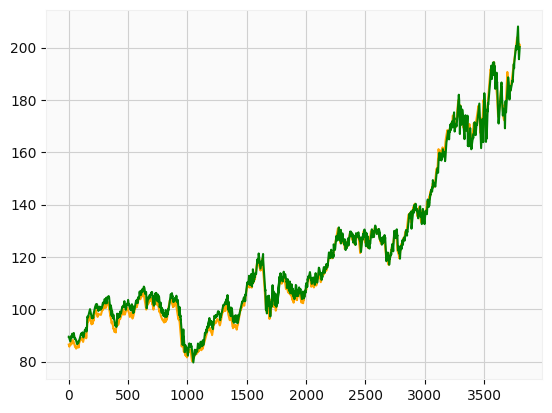

In [54]:
plt.plot(predicted_prices,'orange') # Orange indicates the predicted plot
plt.plot(target_prices,'g')# Green indicates the actual target plot

In [55]:
X_test,y_test = create_data(test.values,10)
X_test.shape
# Creating the test data

torch.Size([496, 10, 5])

In [56]:
test_dataset = Dataloader(X_test,y_test)

<ipython-input-28-e367773034bd>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x,dtype=torch.float32)
<ipython-input-28-e367773034bd>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y,dtype=torch.float32)


In [57]:
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)

<ipython-input-57-d7f67838a6b5>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-57-d7f67838a6b5>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test,dtype=torch.float32)


In [58]:
with torch.no_grad():
    predictions = model(X_test)

In [59]:
# loss_fn = nn.MSELoss()
# loss = loss_fn(predicted_prices, target_prices)
# predictions = predictions.numpy()
# test_targets = y_test.numpy()
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print or log the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 0.131537064909935
Root Mean Squared Error (RMSE): 0.16856282949447632
R-squared (R2) Score: 0.97195560116812


In [60]:
predicted_prices = scaler_y.inverse_transform(predictions)
target_prices = scaler_y.inverse_transform(y_test)
predicted_prices = np.array(predicted_prices).flatten()
target_prices = np.array(target_prices).flatten()
print(predicted_prices)
print(target_prices)

[ 77.55736627  77.02951958  76.37540784  77.53547023  77.40165409
  79.0039702   79.26191297  79.38742082  79.29658345  77.89793627
  78.44997867  78.31560865  78.91724141  78.03329487  77.58318859
  77.43795818  76.34065322  77.07308029  76.82456059  77.66971405
  77.871525    77.47355415  78.43154618  78.18148401  78.65560372
  78.40277213  78.91173059  79.82836344  78.97480353  77.80833288
  78.13177447  78.55218122  78.33740653  78.88153327  78.67444988
  79.00105353  78.89424461  78.00522195  78.28819478  78.88781532
  79.24570303  79.75878409  79.76358678  80.21995408  80.18000415
  79.50928984  79.87623604  80.12473471  81.17023377  80.81352394
  80.51678108  80.24196931  82.0605535   81.58991136  82.27081297
  83.01000587  83.6114283   84.49138545  85.32163305  85.9426869
  85.7076638   86.58348433  86.35355138  86.57077299  86.93312685
  84.73122525  85.19282994  84.63850187  86.11562564  85.7238457
  85.28884158  86.03682654  85.76020588  86.31454096  85.17470593
  85.0940558

In [61]:
# loss_fn = nn.MSELoss()
# loss = loss_fn(predicted_prices, target_prices)
# predictions = predictions.numpy()
# test_targets = y_test.numpy()
mae = mean_absolute_error(target_prices, predicted_prices)
mse = mean_squared_error(target_prices, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(target_prices, predicted_prices)

# Print or log the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 3.8681347070211527
Root Mean Squared Error (RMSE): 4.956958557360315
R-squared (R2) Score: 0.9719556012287482


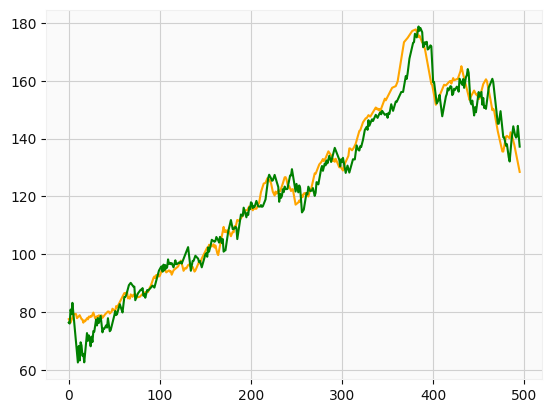

In [62]:
plt.plot(predicted_prices,'orange')
plt.plot(target_prices,'green')

7. Set up a trading module that will make some hard-coded logical decisions to buy, hold, sell (in any
order, because in shorting you can sell first and buy later). [2]

In [63]:
# Bid ask spread
# The bid ask spread is defined as the difference between the lowest price the seller is willing to accept and the highest price offered by the buyer
# Bid-ask spread = high - low .  It can also be normalised to the stock's current closing price.
# Note that this is only a rough estimate
test_data = daily_data[idx+11:-1]
# We have access to the low and high of the previous day. Hence, we can exploit this to compute the bid ask spread normalised by the closing prices predicted for the previous day by the LSTM model
Bid_ask = (test_data['High'] - test_data['Low'])/predicted_prices[:-1] # We are not gonna find the bid ask spread for the last predicted price since it's not necessary
test_data['Bid_ask'] = Bid_ask

<ipython-input-63-eb96bc4ec326>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Bid_ask'] = Bid_ask


In [64]:
len(test_data)

495

In [65]:
bid_data = test_data['Bid_ask'].reset_index(drop = True)
bid_data.shape

(495,)

In [66]:
test_data

,date,Open,High,Low,Close,Volume,Bid_ask
3822,2020-03-11,69.8130,70.7700,66.6607,67.9088,3787833,0.052984
3823,2020-03-12,62.8682,66.2414,61.3231,62.5712,3632838,0.063850
3824,2020-03-13,65.7481,68.5797,62.8968,68.2738,2001475,0.074407
3825,2020-03-16,62.5613,65.7284,60.8052,63.2618,3871498,0.063496
3826,2020-03-17,65.1364,69.5860,63.0842,69.5466,2442765,0.084001
...,...,...,...,...,...,...,...
4312,2022-02-17,134.8000,134.8000,129.7100,130.2500,1522992,0.037349
4313,2022-02-18,130.5000,133.4300,130.0000,132.0500,1296504,0.025371
4314,2022-02-22,131.7300,132.6899,129.2600,130.5500,1807525,0.025643
4315,2022-02-23,129.8800,134.3700,125.9500,125.9900,2300338,0.063490


In [67]:
# Defining the trading simulator that decides on which action to perform
def simulate_trading(predictions, stock_prices,test_data, initial_capital=10000, bid_ask_spread_percentage=0.02, brokerage_fee=2):
    # Simulated portfolio and capital
    portfolio = 0  # Number of shares held
    capital = initial_capital  # Initial capital in dollars
    actions = []  # List to store trading actions

    # Define trading logic
    for i in range(len(predictions)):
        prediction = predictions[i]
        current_price = stock_prices[i]
        trade_executed = False
        if(i!=0):
          bid_ask_spread_percentage = test_data.iloc[i-1]

        # Buy signal (absolute price prediction)
        if prediction > current_price:
            # Calculate how many shares to buy based on available capital
            max_buyable_shares = capital // current_price
            if max_buyable_shares > 0:
                # Calculate transaction cost for buying
                transaction_cost = brokerage_fee + (current_price * bid_ask_spread_percentage)
                max_buyable_shares_with_cost = (capital - transaction_cost) // current_price
                if max_buyable_shares_with_cost > 0:
                    # Buy a fraction of the max buyable shares (e.g., 50%)
                    buy_shares = math.ceil(max_buyable_shares_with_cost / 2)
                    cost = (buy_shares * current_price) + transaction_cost
                    portfolio += buy_shares
                    capital -= cost
                    actions.append(f"Buy {buy_shares} shares at ${current_price:.2f}")
                    trade_executed = True

        # Sell signal (absolute price prediction)
        elif prediction < current_price:
            # Sell all shares in the portfolio
            if portfolio > 0:
                # Calculate transaction cost for selling
                transaction_cost = brokerage_fee + (current_price * bid_ask_spread_percentage)
                revenue = (portfolio * current_price) - transaction_cost
                capital += revenue
                portfolio = 0
                actions.append(f"Sell {portfolio} shares at ${current_price:.2f}")
                trade_executed = True

        # Hold signal (equal price prediction)
        else:
            actions.append("Hold")
            trade_executed = True

        if not trade_executed:
            actions.append("Hold")

    # Calculate final portfolio value
    final_portfolio_value = (portfolio * stock_prices[-1]) + capital
    print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
    print(f"Profit: ${final_portfolio_value - initial_capital}")
    # Return actions as a list
    return actions,final_portfolio_value

# bid_ask_spread = daily_data['Bid_ask']


8. Test the trading system on the latest years on which the model was not trained.


a) Does the price prediction error increase as you go further from the last time on which it
was trained?


In [68]:
# Calculate Mean Absolute Error (MAE)
mae1 = mean_absolute_error(target_prices[-40:], predicted_prices[-40:])
mae2 = mean_absolute_error(target_prices[:40], predicted_prices[:40])
# The mean absolute error is computed for the first 40 days and then for the last 40 days
# Calculate R-squared (R2) score
r2_1 = r2_score(target_prices, predicted_prices)
r2_2 = r2_score(target_prices, predicted_prices)
# Print the error metrics
print(f"Mean Absolute Error (MAE): {mae1:.2f},{mae2:.2f}")
print(f"R-squared (R2) Score: {r2_1:.2f},{r2_2:.2f}")
# We can observe that the price prediction error increases slightly as we go further away from the trained data

Mean Absolute Error (MAE): 6.09,6.30
R-squared (R2) Score: 0.97,0.97


b) Can you profitably trade with the bid-ask spread and commissions taken into account?

In [69]:
trading_actions,portfolio_val = simulate_trading(predicted_prices, target_prices,bid_data,initial_capital = 40000,brokerage_fee = 2)
print(len(trading_actions))
# Print the trading actions
for i, action in enumerate(trading_actions):
    print(f"Day {i + 1}: {action}")
# Clearly, we can observe that the final portfolio value is higher than the initial capital and the profit can be computed as their difference

Final Portfolio Value: $142393.87
Profit: $102393.87203679394
496
Day 1: Buy 262 shares at $76.35
Day 2: Buy 131 shares at $76.03
Day 3: Sell 0 shares at $80.86
Day 4: Hold
Day 5: Hold
Day 6: Hold
Day 7: Buy 270 shares at $77.51
Day 8: Buy 149 shares at $69.79
Day 9: Buy 73 shares at $71.93
Day 10: Buy 38 shares at $67.91
Day 11: Buy 21 shares at $62.57
Day 12: Buy 9 shares at $68.27
Day 13: Buy 5 shares at $63.26
Day 14: Buy 2 shares at $69.55
Day 15: Buy 1 shares at $68.45
Day 16: Buy 1 shares at $64.88
Day 17: Hold
Day 18: Hold
Day 19: Hold
Day 20: Hold
Day 21: Hold
Day 22: Hold
Day 23: Hold
Day 24: Hold
Day 25: Hold
Day 26: Hold
Day 27: Hold
Day 28: Hold
Day 29: Hold
Day 30: Hold
Day 31: Hold
Day 32: Hold
Day 33: Hold
Day 34: Hold
Day 35: Hold
Day 36: Hold
Day 37: Hold
Day 38: Hold
Day 39: Hold
Day 40: Hold
Day 41: Hold
Day 42: Hold
Day 43: Hold
Day 44: Hold
Day 45: Hold
Day 46: Hold
Day 47: Hold
Day 48: Hold
Day 49: Hold
Day 50: Hold
Day 51: Hold
Day 52: Sell 0 shares at $80.39
Da

c) How does your profitability compare to a simple buy-and-hold strategy over long term (e.g.
one or two years)?

In [70]:
# Function to evaluate the portfolio value using simple buy and hold strategy
def buy_and_hold(initial_capital,closing_prices,bid_ask_spread_percentage = 0,brokerage_fee = 2):
  current_price = closing_prices[0]# We buy at the beginning
  transaction_cost = brokerage_fee + (current_price * bid_ask_spread_percentage) # Evaluating the transaction cost
  portfolio = (initial_capital - transaction_cost) // current_price
  portfolio_value = closing_prices[375]*portfolio# Evaluating the portfolio value
  return portfolio_value

In [71]:
simple_portfolio_val = buy_and_hold(40000,predicted_prices)
_,strat_portfolio_val = simulate_trading(predicted_prices, target_prices,bid_data,initial_capital = 40000,brokerage_fee = 2)
print(f"Portfolio value using simple buy and hold strategy: {simple_portfolio_val:.2f}")
print(f"Portfolio value using my strategy: {strat_portfolio_val:.2f}")
# We can conclude that the profitability in my strategy is greater than that in simple buy and hold strategy

Final Portfolio Value: $142393.87
Profit: $102393.87203679394
Portfolio value using simple buy and hold strategy: 90787.21
Portfolio value using my strategy: 142393.87


9. Advanced: [2 bonus]

a) Can you now modify the model to use multiple stock prices as inputs to predict a single
stock (your choice)? Does it improve predictions?

b) Can you add day of the week, day in year, and time as inputs? Does it improve results?

In [72]:
# We can encode each day of the week using OHE
daily_data['date'] = pd.to_datetime(daily_data['date'])
daily_data['dayofweek'] = daily_data['date'].dt.dayofweek
daily_data['dayofyear'] = daily_data['date'].dt.dayofyear
daily_data['dayofweek'] = np.sin(2 * np.pi * daily_data['dayofweek'] / 7)# Encoding the day of the week using sinusoid
daily_data['dayofyear'] = np.sin(2 * np.pi * daily_data['dayofyear'] / 365)# Encoding day of the year using sinusoid

In [73]:
daily_data

,date,Open,High,Low,Close,Volume,dayofweek,dayofyear
0,2005-01-03,14.8242,14.8734,14.4551,14.6827,3218618,0.000000,0.051620
1,2005-01-04,14.6274,14.7565,14.1783,14.3075,3655769,0.781831,0.068802
2,2005-01-05,14.2522,14.5474,14.2214,14.3014,3706235,0.974928,0.085965
3,2005-01-06,14.3936,14.4182,13.9569,13.9877,3052818,0.433884,0.103102
4,2005-01-07,13.9507,14.1168,13.9200,13.9630,2581548,-0.433884,0.120208
...,...,...,...,...,...,...,...,...
4313,2022-02-18,130.5000,133.4300,130.0000,132.0500,1296504,-0.433884,0.746972
4314,2022-02-22,131.7300,132.6899,129.2600,130.5500,1807525,0.781831,0.790946
4315,2022-02-23,129.8800,134.3700,125.9500,125.9900,2300338,0.974928,0.801361
4316,2022-02-24,123.7100,128.6300,123.0500,128.2300,2013724,0.433884,0.811539


In [74]:
idx

3811

In [75]:
train,test = train_test_split(daily_data.drop('date',axis=1),idx)
# Splitting data at the 2 year mark

In [76]:
scaler_X = StandardScaler()
train.loc[:,['Open','High','Low','Volume','dayofweek','dayofyear']] = scaler_X.fit_transform(train.drop('Close',axis=1))
train

,Open,High,Low,Close,Volume,dayofweek,dayofyear
0,-1.074149,-1.083931,-1.082521,14.6827,-0.024022,-0.698956,0.071228
1,-1.084782,-1.090207,-1.097581,14.3075,0.173578,0.816811,0.095457
2,-1.105055,-1.101435,-1.095236,14.3014,0.196389,1.191174,0.119658
3,-1.097415,-1.108372,-1.109626,13.9877,-0.098966,0.142231,0.143823
4,-1.121345,-1.124555,-1.111634,13.9630,-0.311988,-1.540143,0.167944
...,...,...,...,...,...,...,...
3807,2.629454,2.664827,2.610452,84.2176,0.055397,1.191174,1.067731
3808,2.650775,2.619800,2.605621,83.2112,-0.752538,0.142231,1.083396
3809,2.597467,2.625099,2.607879,83.9315,-0.946426,-1.540143,1.098739
3810,2.507909,2.492659,2.426337,79.3831,-0.658977,-0.698956,1.142796


In [77]:
# Applying Z-score normalisation that was fit on the training feature data to the test feature data
test.loc[:,['Open','High','Low','Volume','dayofweek','dayofyear']] = scaler_X.fit_transform(test.drop('Close',axis=1))
test

,Open,High,Low,Close,Volume,dayofweek,dayofyear
3812,-1.502707,-1.493699,-1.484533,77.0547,1.137807,1.184845,1.174034
3813,-1.562911,-1.492697,-1.542389,76.3542,1.646380,0.131344,1.187341
3814,-1.624789,-1.600962,-1.616391,76.0287,2.443840,-1.558340,1.200298
3815,-1.547527,-1.435892,-1.513294,80.8631,2.413375,-0.713498,1.237024
3816,-1.394341,-1.335644,-1.444507,79.2648,1.814276,0.808855,1.248540
...,...,...,...,...,...,...,...
4313,0.290710,0.343153,0.320875,132.0500,0.512134,-1.558340,1.055440
4314,0.332408,0.318086,0.295646,130.5500,1.440387,0.808855,1.117377
4315,0.269692,0.374989,0.182798,125.9900,2.335566,1.184845,1.132047
4316,0.060527,0.180582,0.083927,128.2300,1.814941,0.131344,1.146383


In [78]:
# # Applying z-score normalisation to the target data
scaler_y = StandardScaler()
train['Close'] = scaler_y.fit_transform(train.drop(['Open','High','Low','Volume','dayofweek','dayofyear'],axis=1))
train # Printing the transformed train dataframe

,Open,High,Low,Close,Volume,dayofweek,dayofyear
0,-1.074149,-1.083931,-1.082521,-1.082874,-0.024022,-0.698956,0.071228
1,-1.084782,-1.090207,-1.097581,-1.103151,0.173578,0.816811,0.095457
2,-1.105055,-1.101435,-1.095236,-1.103481,0.196389,1.191174,0.119658
3,-1.097415,-1.108372,-1.109626,-1.120435,-0.098966,0.142231,0.143823
4,-1.121345,-1.124555,-1.111634,-1.121770,-0.311988,-1.540143,0.167944
...,...,...,...,...,...,...,...
3807,2.629454,2.664827,2.610452,2.675127,0.055397,1.191174,1.067731
3808,2.650775,2.619800,2.605621,2.620736,-0.752538,0.142231,1.083396
3809,2.597467,2.625099,2.607879,2.659664,-0.946426,-1.540143,1.098739
3810,2.507909,2.492659,2.426337,2.413847,-0.658977,-0.698956,1.142796


In [79]:
scaler_y.inverse_transform(train.drop(['Open','High','Low','Volume','dayofweek','dayofyear'],axis=1))

array([[14.6827],
       [14.3075],
       [14.3014],
       ...,
       [83.9315],
       [79.3831],
       [76.9067]])

In [80]:
# Applying Z-score normalisation that was fit on the training target data to the test target data
test['Close'] = scaler_y.fit_transform(test.drop(['Open','High','Low','Volume','dayofweek','dayofyear'],axis=1))
test # Printing the transformed test data

,Open,High,Low,Close,Volume,dayofweek,dayofyear
3812,-1.502707,-1.493699,-1.484533,-1.526527,1.137807,1.184845,1.174034
3813,-1.562911,-1.492697,-1.542389,-1.550347,1.646380,0.131344,1.187341
3814,-1.624789,-1.600962,-1.616391,-1.561416,2.443840,-1.558340,1.200298
3815,-1.547527,-1.435892,-1.513294,-1.397021,2.413375,-0.713498,1.237024
3816,-1.394341,-1.335644,-1.444507,-1.451371,1.814276,0.808855,1.248540
...,...,...,...,...,...,...,...
4313,0.290710,0.343153,0.320875,0.343605,0.512134,-1.558340,1.055440
4314,0.332408,0.318086,0.295646,0.292597,1.440387,0.808855,1.117377
4315,0.269692,0.374989,0.182798,0.137533,2.335566,1.184845,1.132047
4316,0.060527,0.180582,0.083927,0.213704,1.814941,0.131344,1.146383


In [81]:
X,y = create_data(train.values,10)

In [82]:
print(X.shape,y.shape)

torch.Size([3802, 10, 7]) torch.Size([3802, 1])


In [83]:
dataset = Dataloader(X,y)

<ipython-input-28-e367773034bd>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x,dtype=torch.float32)
<ipython-input-28-e367773034bd>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y,dtype=torch.float32)


In [84]:
train_loader = DataLoader(dataset,shuffle=False,batch_size=64)

In [85]:
input_data = []
target_data = []
for batch_inputs, batch_targets in train_loader:
    # Append the batch data to the lists
    input_data.append(batch_inputs)
    target_data.append(batch_targets)

In [86]:
len(input_data)

print(input_data[0].shape,target_data[0].shape)

torch.Size([64, 10, 7]) torch.Size([64, 1])


In [87]:
# Creating the LSTM model
input_dim = 7
hidden_dim = 64
num_layers = 2
output_dim = 1
seq_length = 10
model = LSTM(input_dim, hidden_dim, num_layers, output_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Set the model in training mode
    total_loss = 0.0

    for batch_inputs, batch_targets in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_inputs)
        # Compute the loss
        loss = criterion(outputs, batch_targets)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Calculate and print the average loss for the epoch
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

Epoch [1/10], Loss: 0.3096
Epoch [2/10], Loss: 0.0768
Epoch [3/10], Loss: 0.0615
Epoch [4/10], Loss: 0.0394
Epoch [5/10], Loss: 0.0594
Epoch [6/10], Loss: 0.0363
Epoch [7/10], Loss: 0.0224
Epoch [8/10], Loss: 0.0212
Epoch [9/10], Loss: 0.0211
Epoch [10/10], Loss: 0.0210


In [88]:
model.eval()

LSTM(
  (lstm): LSTM(7, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [89]:
X_train,y_train = create_data(test.values,10)
X_train.shape

torch.Size([496, 10, 7])

In [90]:
train_dataset = Dataloader(X_train,y_train)

<ipython-input-28-e367773034bd>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x,dtype=torch.float32)
<ipython-input-28-e367773034bd>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y,dtype=torch.float32)


In [91]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)

<ipython-input-91-b35ba482addd>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-91-b35ba482addd>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train,dtype=torch.float32)


In [92]:
with torch.no_grad():
    predictions = model(X_train)

In [93]:
loss_fn = nn.MSELoss()
loss = loss_fn(predictions, y_train)
predictions = predictions.numpy()
train_targets = y_train.numpy()
mae = mean_absolute_error(train_targets, predictions)
mse = mean_squared_error(train_targets, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(train_targets, predictions)

# Print or log the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 0.08847132325172424
Mean Squared Error (MSE): 0.022244464606046677
Root Mean Squared Error (RMSE): 0.14914578199386597
R-squared (R2) Score: 0.9777139426197041


In [94]:
predicted_prices = scaler_y.inverse_transform(predictions)
target_prices = scaler_y.inverse_transform(train_targets)
predicted_prices = np.array(predicted_prices).flatten()
target_prices = np.array(target_prices).flatten()
# print(predicted_prices)
# print(target_prices)

In [95]:
predicted_prices

array([130.98372 ,  79.439095,  98.18934 , 145.27898 , 156.9614  ,
       130.99265 ,  79.75999 ,  97.70017 , 144.99973 , 157.06409 ,
       130.91463 ,  79.1666  ,  97.59286 , 145.3216  , 157.31024 ,
       130.88284 ,  78.740395,  97.25454 , 145.22401 , 157.24864 ,
       130.90189 ,  78.60522 ,  97.41995 , 144.57141 , 156.7908  ,
       130.71594 ,  79.865555,  99.04057 , 146.70917 , 157.98738 ,
       130.77925 ,  97.22659 , 145.35724 , 157.33138 , 130.89847 ,
        78.45772 ,  97.2678  , 145.32352 , 157.33514 , 130.89253 ,
        78.52314 ,  97.2016  , 145.35338 , 157.36789 , 130.91882 ,
        78.2645  ,  97.43239 , 145.31366 , 157.35223 , 130.93886 ,
        78.27576 ,  97.52353 , 145.08098 , 157.59232 , 130.79292 ,
        78.821884,  99.130035, 146.64485 , 157.9952  , 130.76309 ,
        97.53905 , 145.58546 , 157.47353 , 130.95993 ,  78.07395 ,
        97.484146, 145.64482 , 157.45638 , 130.93983 ,  78.259445,
        97.26719 , 145.6329  , 157.46309 , 130.95285 ,  78.057

In [96]:
X_test,y_test = create_data(test.values,10)
X_test.shape

torch.Size([496, 10, 7])

In [97]:
test_dataset = Dataloader(X_test,y_test)

<ipython-input-28-e367773034bd>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x,dtype=torch.float32)
<ipython-input-28-e367773034bd>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y,dtype=torch.float32)


In [98]:
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)

<ipython-input-98-d7f67838a6b5>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-98-d7f67838a6b5>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test,dtype=torch.float32)


In [99]:
with torch.no_grad():
    predictions = model(X_test)

In [100]:
loss_fn = nn.MSELoss()
loss = loss_fn(predictions, y_test)
predictions = predictions.numpy()
test_targets = y_test.numpy()
mae = mean_absolute_error(test_targets, predictions)
mse = mean_squared_error(test_targets, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_targets, predictions)

# Print or log the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 0.08847132325172424
Mean Squared Error (MSE): 0.022244464606046677
Root Mean Squared Error (RMSE): 0.14914578199386597
R-squared (R2) Score: 0.9777139426197041


In [101]:
predicted_prices = scaler_y.inverse_transform(predictions)
target_prices = scaler_y.inverse_transform(test_targets)
predicted_prices = np.array(predicted_prices).flatten()
target_prices = np.array(target_prices).flatten()
# print(predicted_prices)
# print(target_prices)

In [102]:
# Calculate Mean Absolute Error (MAE)
mae1 = mean_absolute_error(target_prices[-40:], predicted_prices[-40:])
mae2 = mean_absolute_error(target_prices[:40], predicted_prices[:40])
# The mean absolute error is computed for the first 40 days and then for the last 40 days
# Calculate R-squared (R2) score
r2_1 = r2_score(target_prices, predicted_prices)
r2_2 = r2_score(target_prices, predicted_prices)
# Print the error metrics
print(f"Mean Absolute Error (MAE): {mae1:.2f},{mae2:.2f}")
print(f"R-squared (R2) Score: {r2_1:.2f},{r2_2:.2f}")
# We can observe that the price prediction error increases slightly as we go further away from the trained data

Mean Absolute Error (MAE): 3.18,2.54
R-squared (R2) Score: 0.98,0.98


In [103]:
test_data = daily_data[idx+11:-1]
# We have access to the low and high of the previous day. Hence, we can exploit this to compute the bid ask spread normalised by the closing prices predicted for the previous day by the LSTM model
Bid_ask = (test_data['High'] - test_data['Low'])/predicted_prices[:-1] # We are not gonna find the bid ask spread for the last predicted price since it's not necessary
test_data['Bid_ask'] = Bid_ask
bid_data = test_data['Bid_ask'].reset_index(drop = True)
bid_data.shape

<ipython-input-103-91ef922183d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Bid_ask'] = Bid_ask


(495,)

In [104]:
simple_portfolio_val = buy_and_hold(10000,predicted_prices)
_,strat_portfolio_val = simulate_trading(predicted_prices, target_prices,bid_data,initial_capital = 10000,brokerage_fee = 10)
print(f"Portfolio value using simple buy and hold strategy: {simple_portfolio_val:.2f}")
print(f"Portfolio value using my strategy: {strat_portfolio_val:.2f}")
# We can conclude that the profitability in my strategy is greater than that in simple buy and hold strategy

Final Portfolio Value: $79.07
Profit: $-9920.930956990049
Portfolio value using simple buy and hold strategy: 7442.81
Portfolio value using my strategy: 79.07


In [105]:
target_prices.shape

(496,)